<a href="https://colab.research.google.com/github/punam-bhattarai/Data-Visualization/blob/main/FLIGHT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_excel('flight_price.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution?

Text(0.5, 1.0, 'Distribution of Flight Prices')

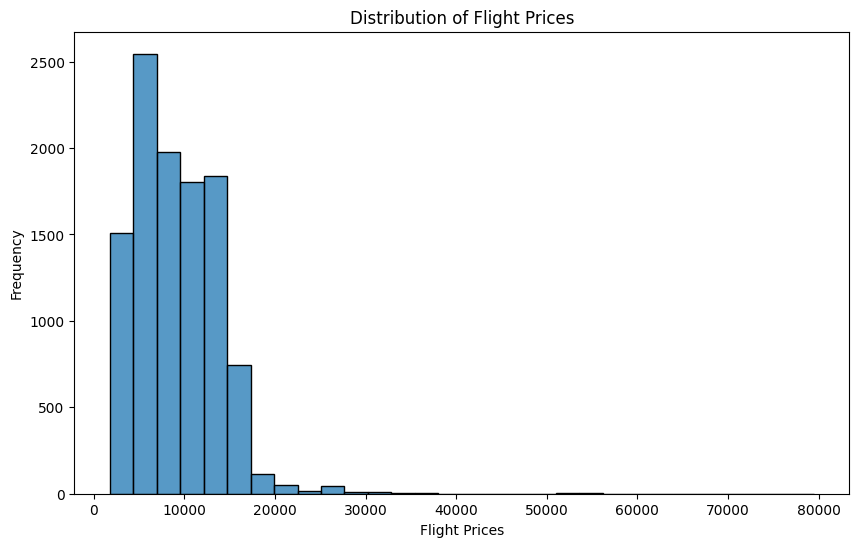

In [ ]:
plt.figure(figsize= (10,6))
sns.histplot(data =df, x ='Price', bins =30,)
plt.xlabel('Flight Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')




3. What is the range of prices in the dataset? What is the minimum and maximum price?


In [ ]:
minimum_price = df['Price'].min()
maximum_price = df['Price'].max()
range = maximum_price - minimum_price
print("Range of the prices in the dataset is: ", range)
print("Maximum price is:", maximum_price)
print("Minimum price is:", minimum_price)

Range of the prices in the dataset is:  77753
Maximum price is: 79512
Minimum price is: 1759


4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.


<ipython-input-17-ed9307449e7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x= 'Airline', y ='Price', palette = 'dark')


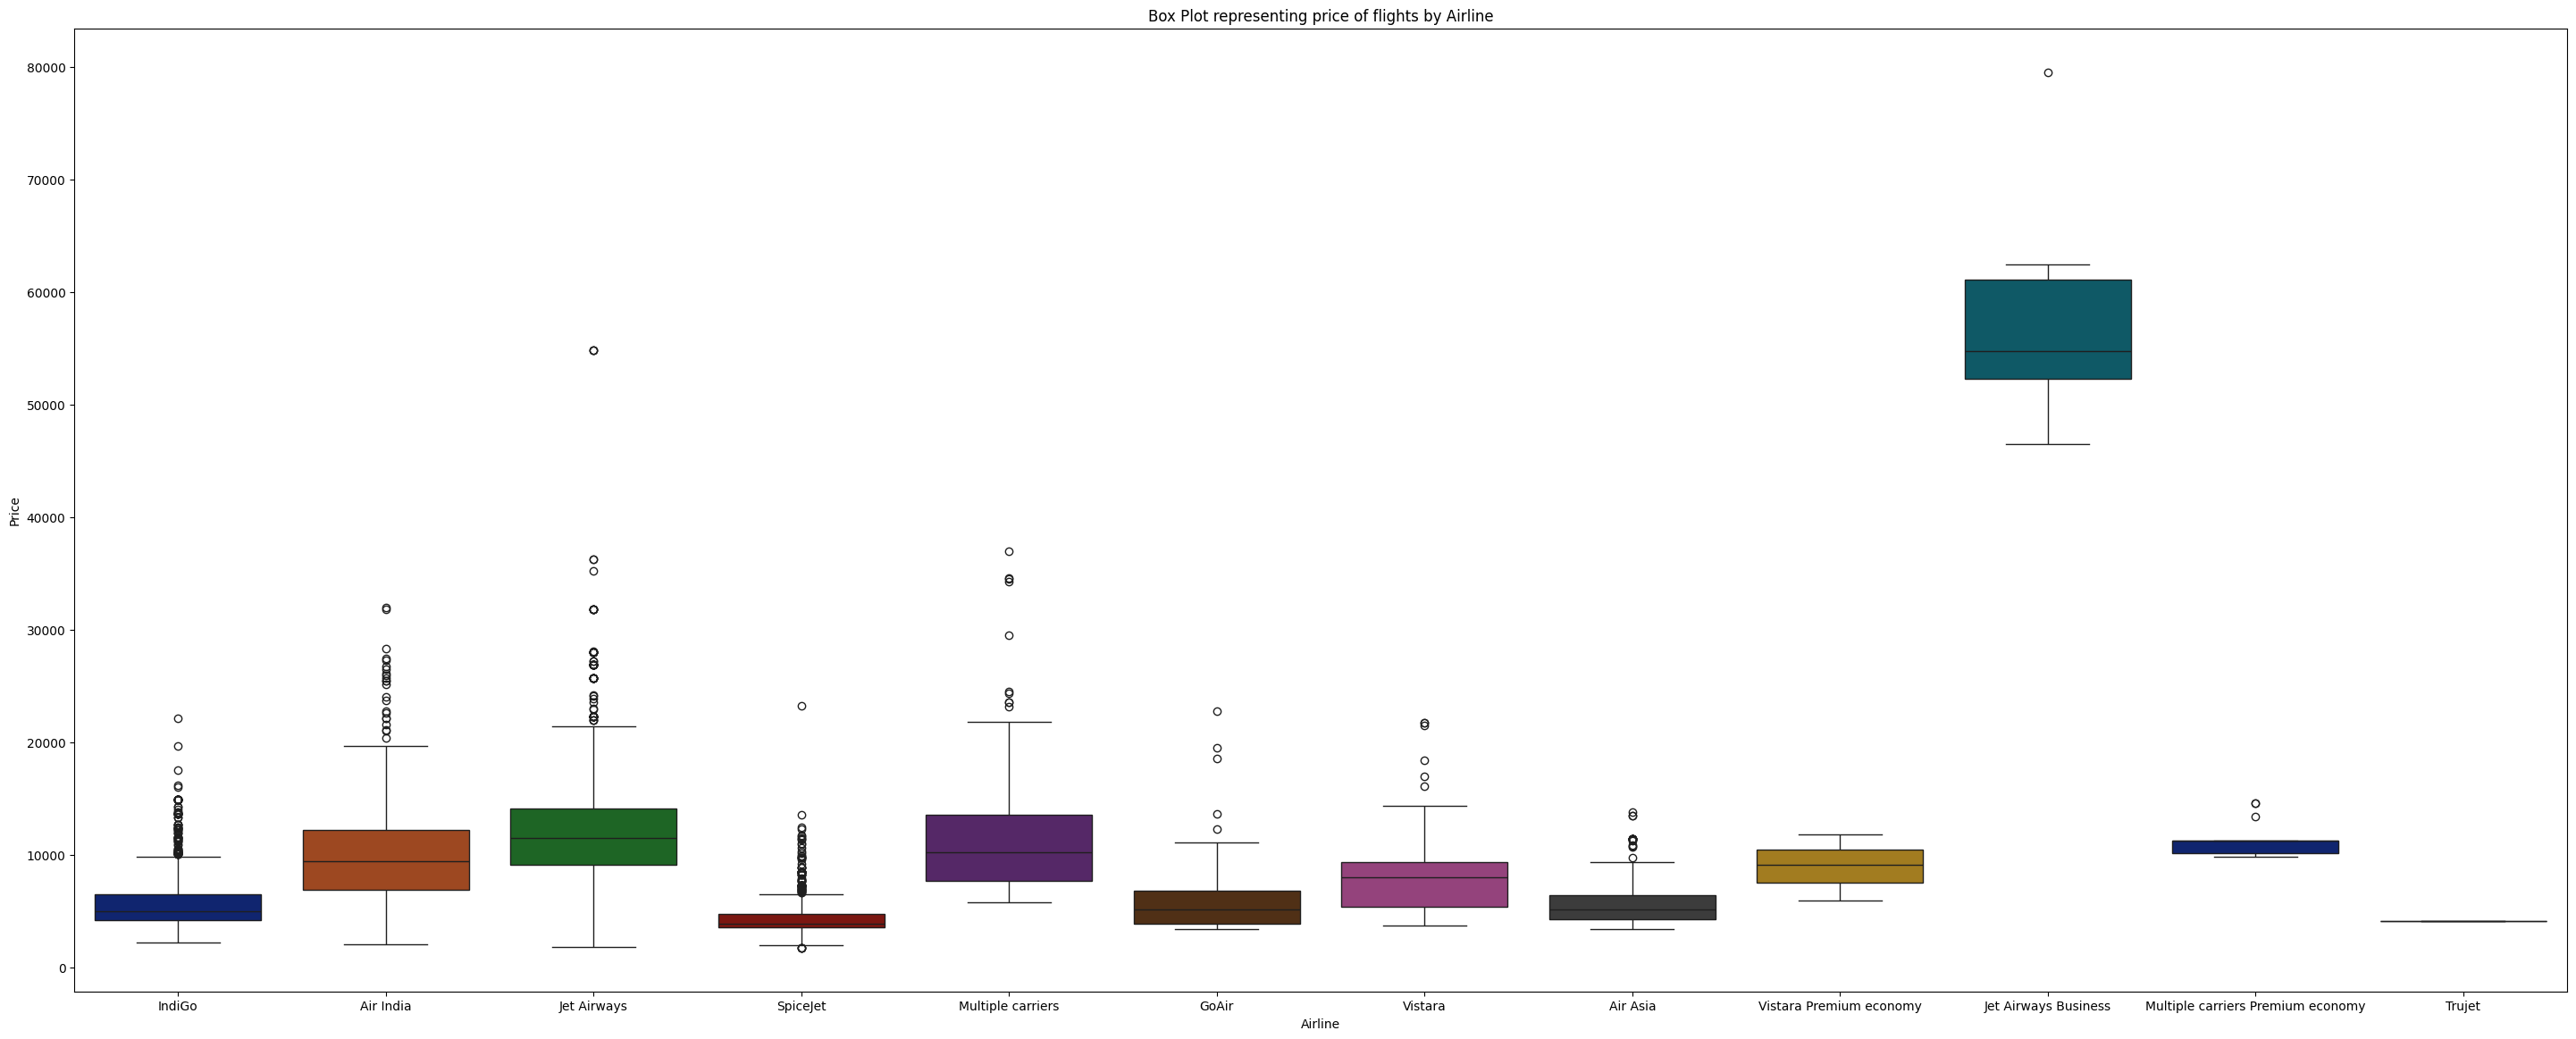

In [ ]:

plt.figure(figsize=(36,14))
sns.boxplot(data=df, x= 'Airline', y ='Price', palette = 'dark')
plt.title('Box Plot representing price of flights by Airline')
plt.show()


5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.


Text(0.5, 1.0, 'Box Plot of Flight Prices')

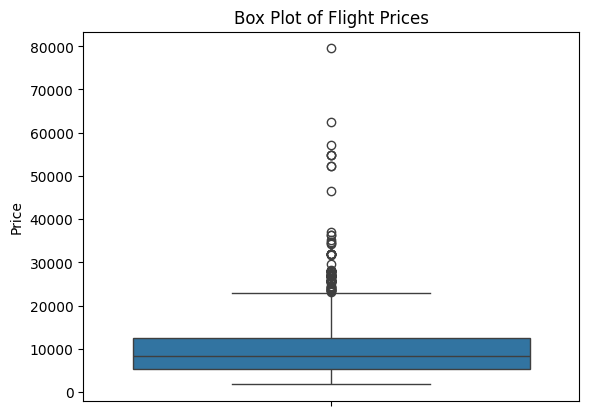

In [ ]:
sns.boxplot(data = df,  y = 'Price')
plt.title('Box Plot of Flight Prices')

6. You are working for a travel agency, and your boss has asked you to analyze
the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

Analyzing flight prices over time uncovers patterns and seasonal changes in pricing trends. Using a time series plot, we can see how flight prices change over different periods and how they relate to travel demand. This helps us pinpoint peak travel seasons when prices are highest, giving us insights into when people travel the most and when prices tend to go up.

In [23]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


<ipython-input-23-70e457e0a264>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


In [24]:
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year


In [25]:
avg_prices_by_month = df.groupby(['Year', 'Month'])['Price'].mean()


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, '(2019, 12)'),
  Text(0.0, 0, '(2019, 1)'),
  Text(1.0, 0, '(2019, 3)'),
  Text(2.0, 0, '(2019, 4)'),
  Text(3.0, 0, '(2019, 5)'),
  Text(4.0, 0, '(2019, 6)'),
  Text(5.0, 0, '(2019, 9)'),
  Text(6.0, 0, '(2019, 12)'),
  Text(7.0, 0, '')])

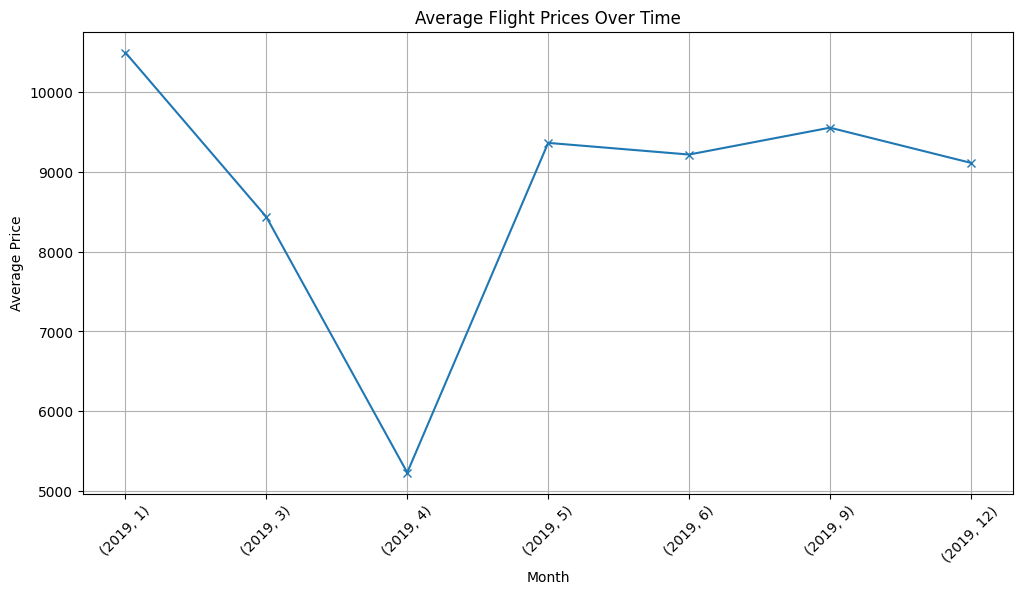

In [31]:
plt.figure(figsize=(12, 6))
avg_prices_by_month.plot(marker='x')
plt.title('Average Flight Prices Over Time')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.xticks(rotation=45)



7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?



Analyzing flight prices over time, including monthly, weekly, and seasonal variations, provides valuable insights into pricing trends. Additionally, understanding price disparities across different routes and destinations is crucial for identifying popular travel routes and destinations with varying price levels. By visualizing average flight prices using heatmaps across different months and routes, seasonal fluctuations in pricing for specific routes can be easily identified. This comprehensive analysis enables stakeholders to make informed decisions regarding pricing strategies and resource allocation, optimizing revenue generation and customer satisfaction in the aviation industry.


Text(120.72222222222221, 0.5, 'Month')

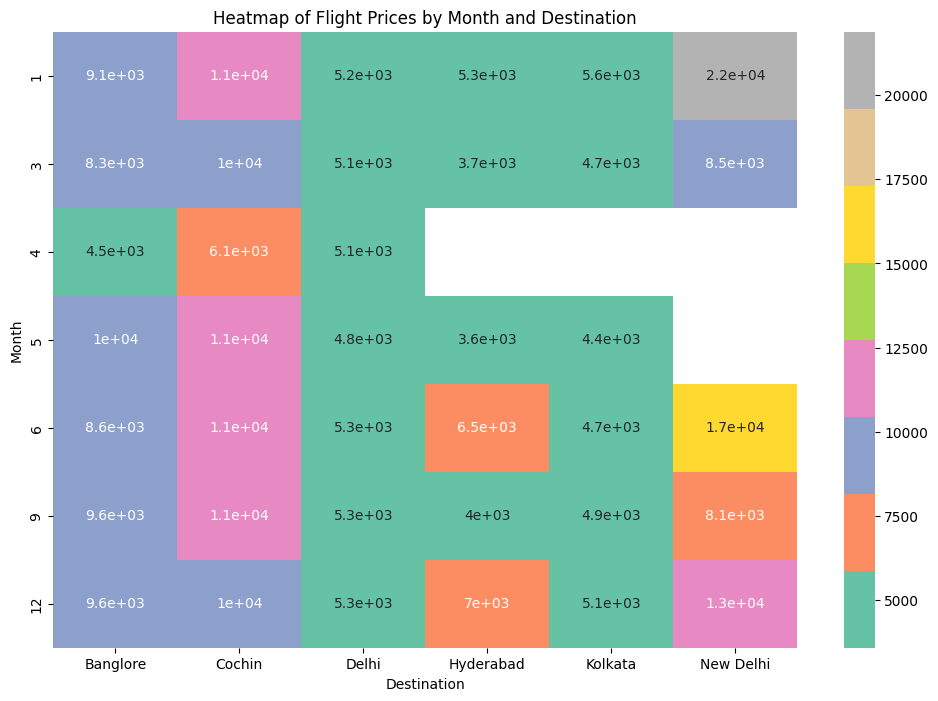

In [42]:
heatmap_data = df.pivot_table(index='Month', columns='Destination', values='Price', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Set2', annot=True)
plt.title('Heatmap of Flight Prices by Month and Destination')
plt.xlabel('Destination')
plt.ylabel('Month')

8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

Inorder to understand what affects flight prices using the Flight Price dataset, I'd look at things like where flights leave from and arrive, how long they take, and how far they travel. I'd use heatmaps to show these findings to the management team. This would help them see how prices change depending on when flights leave and arrive, and which days of the week people travel the most. It would give them a clearer idea of when to adjust prices and plan resources.

In [43]:
airline_mapping = {
    'Jet Airways': 0, 'IndiGo': 1, 'Air India': 2, 'Multiple carriers': 3,
    'SpiceJet': 4, 'Vistara': 5, 'GoAir': 6, 'Air Asia': 7,
    'Multiple carriers Premium economy': 3, 'Jet Airways Business': 0,
    'Vistara Premium economy': 5, 'Trujet': 4
}
df['Airline'] = df['Airline'].map(airline_mapping)
df['Dep_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_mins'] = df['Dep_Time'].str.split(':').str[1]
df.drop('Dep_Time', axis=1, inplace=True)
df['Arrival_hour'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_mins'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.drop('Arrival_Time', axis=1, inplace=True)

# Converting Duration into Minutes
def convert_into_minutes(Duration):
    total_minutes = 0
    for i in Duration.split():
        if 'h' in i:
            total_minutes += int(i.replace('h','')) * 60
        if 'm' in i:
            total_minutes += int(i.replace('m',''))
    return total_minutes

df['Duration'] = df['Duration'].apply(convert_into_minutes)
df.drop(['Additional_Info', 'Route'], axis=1, inplace=True)

source_mapping = {'Delhi': 0, 'Kolkata': 1, 'Banglore': 2, 'Mumbai': 3, 'Chennai': 4}
destination_mapping = {'Cochin': 0, 'Banglore': 1, 'Delhi': 2, 'New Delhi': 3, 'Hyderabad': 4}
df['Source'] = df['Source'].map(source_mapping)
df['Destination'] = df['Destination'].map(destination_mapping)

total_stops_mapping = {'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4, 'nan': 1}
df['Total_Stops'] = df['Total_Stops'].map(total_stops_mapping)


<ipython-input-49-93b8e4e7327e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="RdBu")


<Axes: >

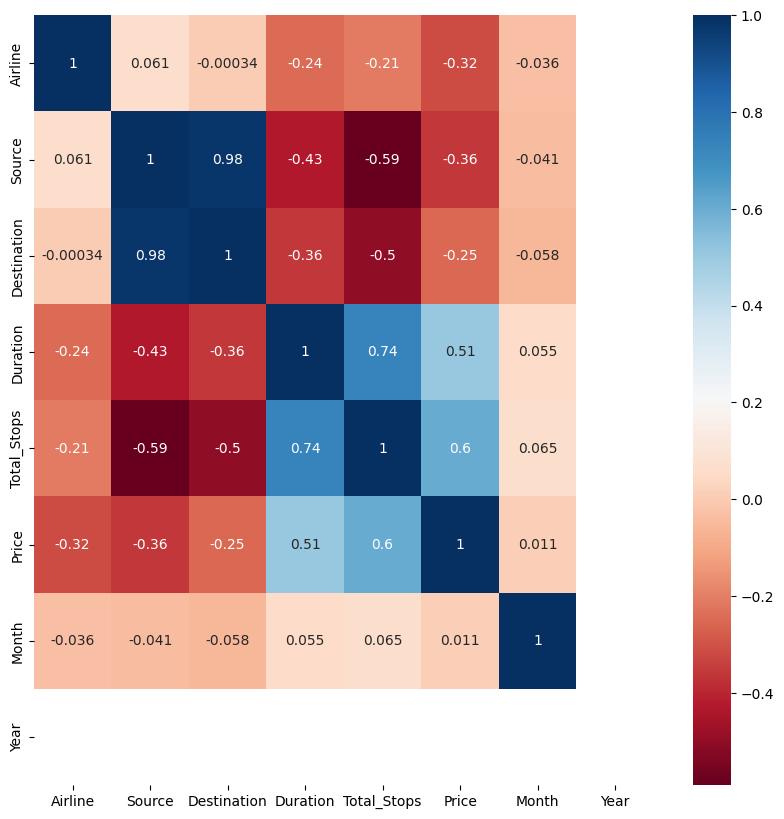

In [49]:

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
